In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# daatset api
!kaggle competitions download -c cifar-10

cifar-10.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [ ]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 88.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 83.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.9/412.9 kB 33.2 MB/s eta 0:00:00


In [ ]:
import py7zr

archive=py7zr.SevenZipFile('/content/train.7z','r')
archive.extractall()
archive.close()

In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [ ]:
#importing libraries
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split


In [ ]:
filenames=os.listdir('/content/train')

In [ ]:
type(filenames)

list

In [ ]:
len(filenames)

50000

In [ ]:
print(filenames[:5])
print(filenames[-5:])
#the obtained files or not in ordder

['13053.png', '9861.png', '15877.png', '17920.png', '3952.png']
['26983.png', '49467.png', '40134.png', '13112.png', '27077.png']


In [ ]:
labels_df=pd.read_csv('/content/trainLabels.csv')

In [ ]:
labels_df.shape

(50000, 2)

In [ ]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [ ]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [ ]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [ ]:
labels_df['label']

,label
0,frog
1,truck
2,truck
3,deer
4,automobile
...,...
49995,bird
49996,frog
49997,truck
49998,automobile


In [ ]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}
labels=[labels_dictionary[i] for i in labels_df['label']]

In [ ]:
print(labels[:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


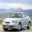

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img=cv2.imread('/content/train/49999.png')
cv2_imshow(img)

In [ ]:
labels_df[labels_df["id"]==49999]

,id,label
49998,49999,automobile


In [ ]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
id_list=list(labels_df['id'])

In [ ]:
print(id_list[:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


In [ ]:
#image processing .covert image to np arrays
train_data_folder='/content/train/'
data=[]
for id in id_list:
  image=Image.open(train_data_folder+str(id)+'.png')
  image=np.array(image)
  data.append(image)

In [ ]:
print(type(data),len(data),type(data[0]))

<class 'list'> 50000 <class 'numpy.ndarray'>


In [ ]:
data[0].shape  #3 indcates the rgb value

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
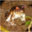

In [ ]:
data[0]

In [ ]:
X = np.array(data)
Y = np.array(labels)

In [ ]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [ ]:
#we do scaling or normalize the data it improves the NN performance
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [ ]:
print(X_train_scaled[0])

[[[0.13333333 0.14117647 0.16862745]
  [0.14509804 0.14509804 0.2       ]
  [0.17254902 0.17254902 0.25098039]
  ...
  [0.24313725 0.28627451 0.36470588]
  [0.20392157 0.24705882 0.3254902 ]
  [0.17647059 0.22352941 0.30196078]]

 [[0.1372549  0.1372549  0.14509804]
  [0.13333333 0.13333333 0.15686275]
  [0.13333333 0.12941176 0.16862745]
  ...
  [0.22745098 0.27058824 0.34901961]
  [0.19607843 0.23529412 0.31372549]
  [0.18431373 0.22745098 0.30588235]]

 [[0.13333333 0.12941176 0.1372549 ]
  [0.12941176 0.1254902  0.14117647]
  [0.12941176 0.1254902  0.14901961]
  ...
  [0.25882353 0.30196078 0.38039216]
  [0.2        0.24313725 0.32156863]
  [0.20784314 0.25098039 0.32941176]]

 ...

 [[0.1254902  0.1254902  0.14901961]
  [0.1254902  0.12156863 0.14509804]
  [0.12941176 0.12941176 0.14901961]
  ...
  [0.16078431 0.14901961 0.17647059]
  [0.13333333 0.12156863 0.14901961]
  [0.14117647 0.1254902  0.15686275]]

 [[0.12941176 0.12156863 0.14117647]
  [0.1254902  0.11764706 0.14117647]


In [ ]:
#building neural networks
import tensorflow as tf
from tensorflow import keras


In [ ]:
num_of_classes=10

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dense(num_of_classes,activation="softmax")
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])


In [ ]:
model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=10) #in each epoch we consider 10 percent of data as test data

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1877 - loss: 2.1475 - val_accuracy: 0.2345 - val_loss: 2.0061
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2605 - loss: 1.9625 - val_accuracy: 0.2537 - val_loss: 1.9684
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2706 - loss: 1.9358 - val_accuracy: 0.2760 - val_loss: 1.9432
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2873 - loss: 1.9159 - val_accuracy: 0.2775 - val_loss: 1.9191
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2926 - loss: 1.9009 - val_accuracy: 0.2937 - val_loss: 1.9089
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2889 - loss: 1.8986 - val_accuracy: 0.2982 - val_loss: 1.9037
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2887 - loss: 1.8999 - val_accuracy: 0.2785 - val_loss: 1.8994
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2930 - loss: 1.8921 - 

In [ ]:
model.evaluate(X_test_scaled,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3004 - loss: 1.8752


[1.8765406608581543, 0.2989000082015991]

In [ ]:
from tensorflow.keras import Sequential,models,layers
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3)) #weare deriving weights from the resnet model trained on imagenet
#we are dropping the final layer of resnet which is trained on imagenet as we have only 10 classes
convolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
model=models.Sequential()
model.add(layers.UpSampling2D((2,2))) #height  and width multiplied by 2
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes,activation="softmax"))

In [ ]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history=model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 461s 364ms/step - accuracy: 0.3323 - loss: 2.0314 - val_accuracy: 0.7565 - val_loss: 0.8983
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 407s 362ms/step - accuracy: 0.6678 - loss: 1.0693 - val_accuracy: 0.8878 - val_loss: 0.4683
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 408s 362ms/step - accuracy: 0.8027 - loss: 0.7504 - val_accuracy: 0.9155 - val_loss: 0.3556
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 362ms/step - accuracy: 0.8650 - loss: 0.5712 - val_accuracy: 0.9265 - val_loss: 0.2875
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 362ms/step - accuracy: 0.9069 - loss: 0.4492 - val_accuracy: 0.9377 - val_loss: 0.2580
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 362ms/step - accuracy: 0.9351 - loss: 0.3584 - val_accuracy: 0.9395 - val_loss: 0.2390
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 362ms/step - accuracy: 0.9547 - loss: 0.2802 - val_accuracy: 0.9420 - val_loss: 0.2240
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 435s 355ms/step - ac

In [ ]:
loss,accuracy=model.evaluate(X_test_scaled,Y_test)
print("Test Accuracy",accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 117ms/step - accuracy: 0.9425 - loss: 0.2050
Test Accuracy 0.9397000074386597


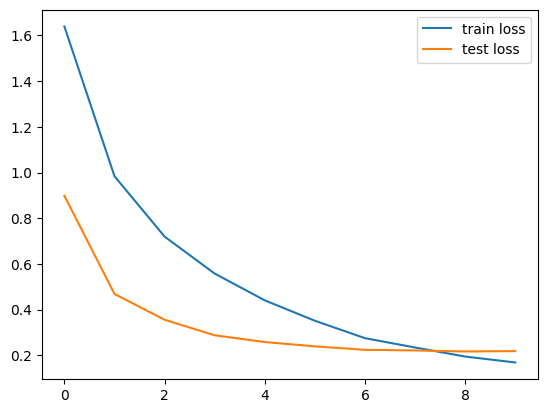

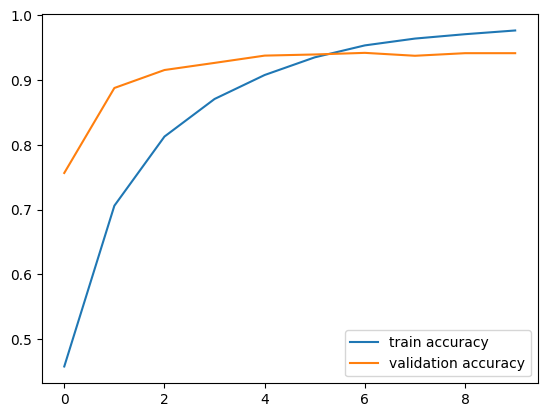

In [ ]:
# prompt: i want to plot the bothe train loss and test loss
h=history
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.legend()
plt.show()
# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()
